In [42]:
import os
from pathlib import Path
import sys

sys.path.append('..')

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
import numpy as np

In [44]:
# Binary classification
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
clf = SVC(random_state=0).fit(X_train, y_train)
y_pred = clf.decision_function(X_test)

print(y_pred[:5])  # Decision fn returns the score

[ 0.64486643 -0.85075125  0.48293928 -1.27476131 -0.55330807]


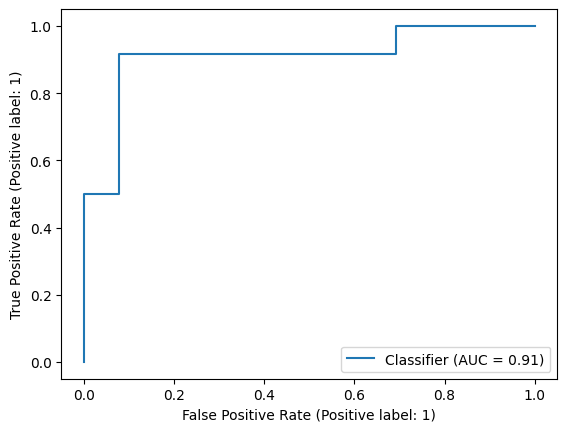

In [46]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print('FPR:', *[f'{x:.3f}' for x in fpr], sep=', ')
print('TPR:', *[f'{x:.3f}' for x in tpr], sep=', ')
print('  T:', *[f'{x:.3f}' for x in thresholds], sep=', ')

FPR:, 0.000, 0.000, 0.000, 0.077, 0.077, 0.692, 0.692, 1.000
TPR:, 0.000, 0.083, 0.500, 0.500, 0.917, 0.917, 1.000, 1.000
  T:, 2.580, 1.580, 0.623, 0.504, -0.328, -0.734, -0.851, -1.275


In [48]:
idx_fpr5 = np.where(fpr <= 0.05)[0][-1]
t_fpr5 = thresholds[idx_fpr5]
print('Threshold @ FPR5:', t_fpr5)

tpr_fpr5 = tpr[idx_fpr5]
print('TPR @ FPR5:', tpr_fpr5)

Threshold @ FPR5: 0.6226137543220871
TPR @ FPR5: 0.5


In [49]:
from baard.utils.eval_utils import tpr_at_n_fpr

tpr_fpr5, t_fpr5 = tpr_at_n_fpr(fpr, tpr, thresholds, 0.05)
print(tpr_fpr5, t_fpr5)

0.5 0.6226137543220871
